In [2]:
!pip install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=d6bc39797d4291d613a9c30603ff229b898bb000fafeb6e8434db3ec8b87ceb2
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


# Initial Example of trajectory prediction via Kalman Filter, with artificial data

<ipython-input-6-fc088feed1a3>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


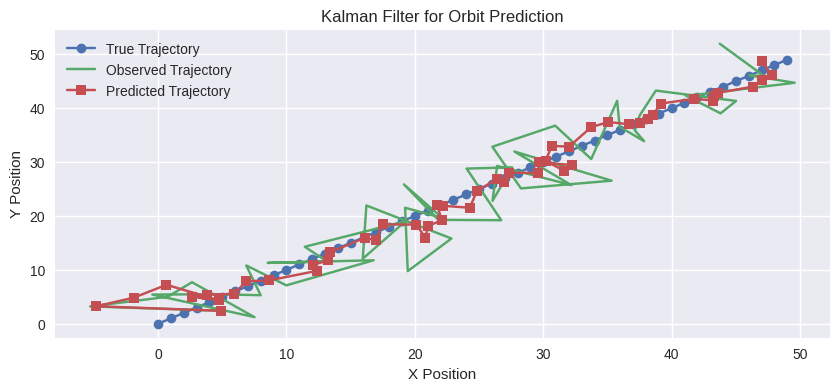

In [6]:
import numpy as np
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import matplotlib.pyplot as plt
plt.style.use('seaborn')

def run_kalman_filter_trajectory_prediction(
    initial_position,
    initial_velocity,
    dt = 1.0,  # Time step (1 second)
):
  # Create the Kalman Filter instance
  kf = KalmanFilter(dim_x=4, dim_z=2)

  # State Transition matrix
  kf.F = np.array([[1, dt, 0,  0],
                  [0,  1, 0,  0],
                  [0,  0, 1, dt],
                  [0,  0, 0,  1]])

  # Measurement function
  kf.H = np.array([[1, 0, 0, 0],
                  [0, 0, 1, 0]])

  kf.x = np.array([initial_position[0], initial_velocity[0], initial_position[1], initial_velocity[1]])

  # Initial uncertainty covariance matrix
  kf.P = np.eye(4) * 500  # Initial uncertainty

  # Process noise covariance matrix
  kf.Q = Q_discrete_white_noise(dim=2, dt=dt, var=0.1, block_size=2)

  # Measurement noise covariance matrix
  kf.R = np.eye(2) * 10  # Measurement uncertainty

  # Simulate the observed trajectory (for demonstration purposes)
  observed_positions = []
  true_positions = []
  for t in range(50):
      # True position (assuming constant velocity for simplicity)
      true_position = initial_position + t * initial_velocity
      true_positions.append(true_position)

      # Simulated noisy observation
      observed_position = true_position + np.random.normal(0, 3, 2)  # Adding measurement noise
      observed_positions.append(observed_position)

  # Convert to numpy arrays for easier manipulation
  observed_positions = np.array(observed_positions)
  true_positions = np.array(true_positions)

  # Apply the Kalman filter
  predicted_positions = []
  for z in observed_positions:
      kf.predict()
      kf.update(z)
      predicted_positions.append(kf.x[[0, 2]])

  # Convert to numpy array
  predicted_positions = np.array(predicted_positions)

  return true_positions, observed_positions, predicted_positions

def plot_results(true_positions, observed_positions, predicted_positions):
  plt.figure(figsize=(10, 4))
  plt.plot(true_positions[:, 0], true_positions[:, 1], label='True Trajectory', marker='o')
  plt.plot(observed_positions[:, 0], observed_positions[:, 1], label='Observed Trajectory', marker='x')
  plt.plot(predicted_positions[:, 0], predicted_positions[:, 1], label='Predicted Trajectory', marker='s')
  plt.xlabel('X Position')
  plt.ylabel('Y Position')
  plt.legend()
  plt.title('Kalman Filter for Orbit Prediction', fontsize=12)
  plt.show()


# Initial state (position and velocity)
initial_position = np.array([0, 0])  # Initial x, y position
initial_velocity = np.array([1, 1])  # Initial x, y velocity

true_positions, observed_positions, predicted_positions = run_kalman_filter_trajectory_prediction(
    initial_position,
    initial_velocity,
    dt = 1.0,  # Time step (1 second)

)
plot_results(true_positions, observed_positions, predicted_positions)